# Vergleich Binomial- und Poissonverteilung

Dieser interaktive Plot zeigt die Einzelwarhscheinlichkeiten beider Verteilungen im Vergleich
(interaktives nur lokal - nicht im web).

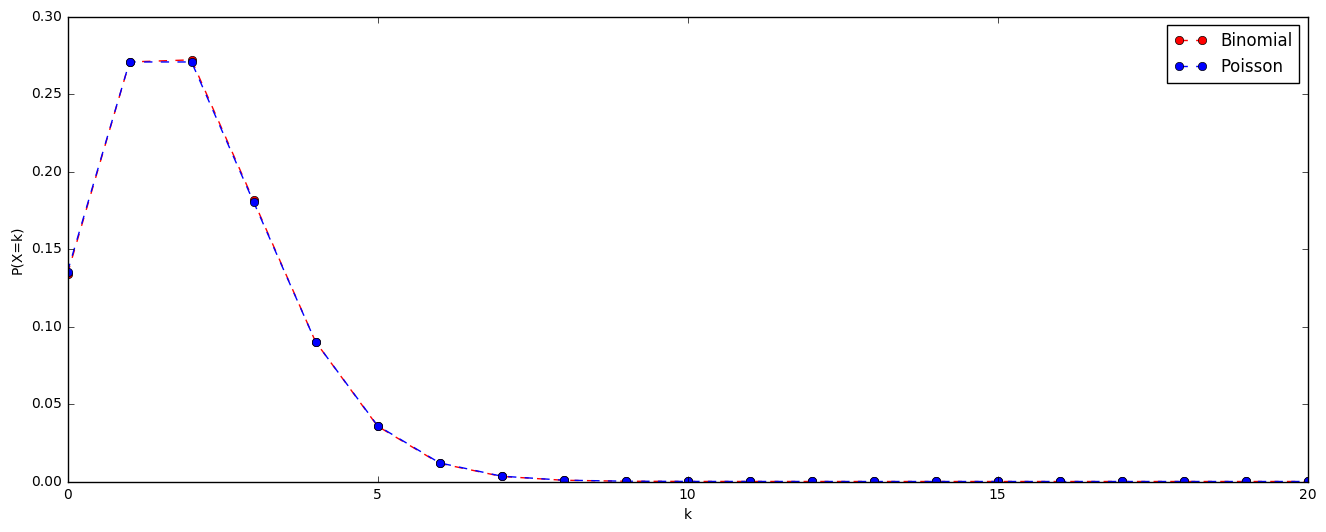

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from math import exp

def binom(n, k):
    """Binomialkoeffizient (vereinfacht)"""
    result = 1
    for n, k in zip(range(n, 0, -1), range(k, 0, -1)):
        result *= n / k
    return result

def draw(n=200, log_p=-2):
    """Dichten berechnen und plotten"""
    p = 10 ** log_p
    λ = p * n
    x = list(range(n + 1))
    # Dichte der Binomialverteilung
    fb = [binom(n, k) * p**k * (1 - p)**(n - k) for k in x]
    # Dichte der Poissonverteilung
    fp = [exp(-λ)] * len(x)
    for k in x[1:]:
        fp[k] = λ / k * fp[k - 1] 

    plt.figure(figsize=(16, 6))
    plt.plot(x, fb, 'ro--', label='Binomial')
    plt.plot(x, fp, 'bo--', label='Poisson')
    plt.xlim(0, 20 if λ < 20 else 100)
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('P(X=k)')

interact(draw, n=(40, 500, 10), log_p=(-3, -0.4, 0.2));